### Task 6
### Author : Manisha Das
### Objective :
To create a Decision Tree Classifier and visualize it graphically. I have used ensemble technique to get a better result as decision trees have high variance.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

### Import the Dataset

In [2]:
df=pd.read_csv('Iris.csv')

df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the above information it follows that there is no missing observation in the dataset

### Delete the Id Column

In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualize the Dataset

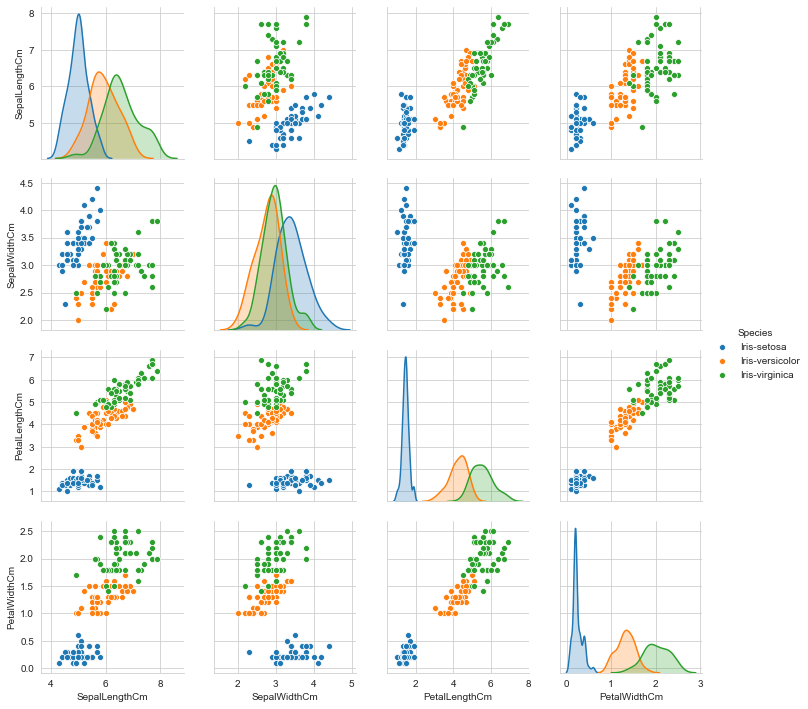

In [6]:
sns.pairplot(df,hue="Species")

From the diagram, it can be inferred that Iris-setosa has very different Petal Width and Petal Length compared to iris-versicolor and Iris-virginica. Also, from the scatter plots it follows that we can easily separate iris-setosa from the other two species.

### Box Plot Representation

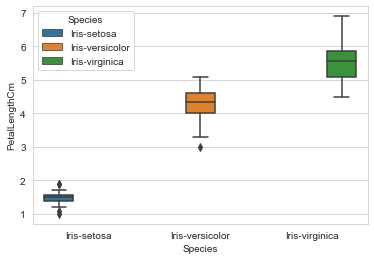

In [7]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df,hue="Species")

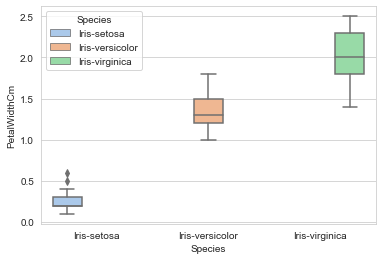

In [8]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df,hue="Species",palette="pastel")

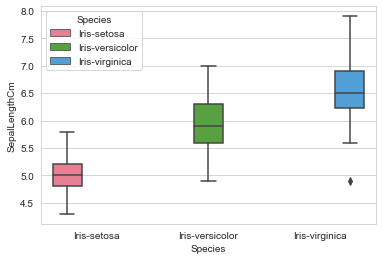

In [9]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df,hue="Species",palette="husl")

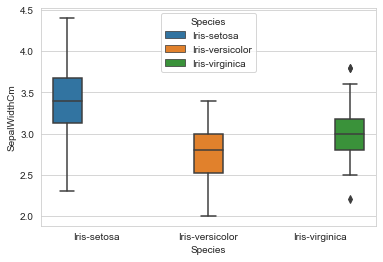

In [10]:
sns.boxplot(x="Species",y="SepalWidthCm",data=df,hue="Species")

### Test Train Split

80 % of the data is used to train the classifier. 
20 % of the data is used for testing purpose.

In [11]:
X=df.loc[:,df.columns!='Species']


In [12]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y=df['Species']

In [14]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=1)

In [19]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Testing the Performance of the Classifier

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
accuracy_score(Y_test,rf.predict(X_test))

1.0

In [22]:
confusion_matrix(Y_test,rf.predict(X_test))

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

We can conclude that the performance of the classifier is really good as it has not misclassified any observation.

### Visualize the Decision Tree

From the 1000 trees in the Random Forest , we have randomly picked a decision tree and represented it visually

In [34]:
from dtreeplt import dtreeplt

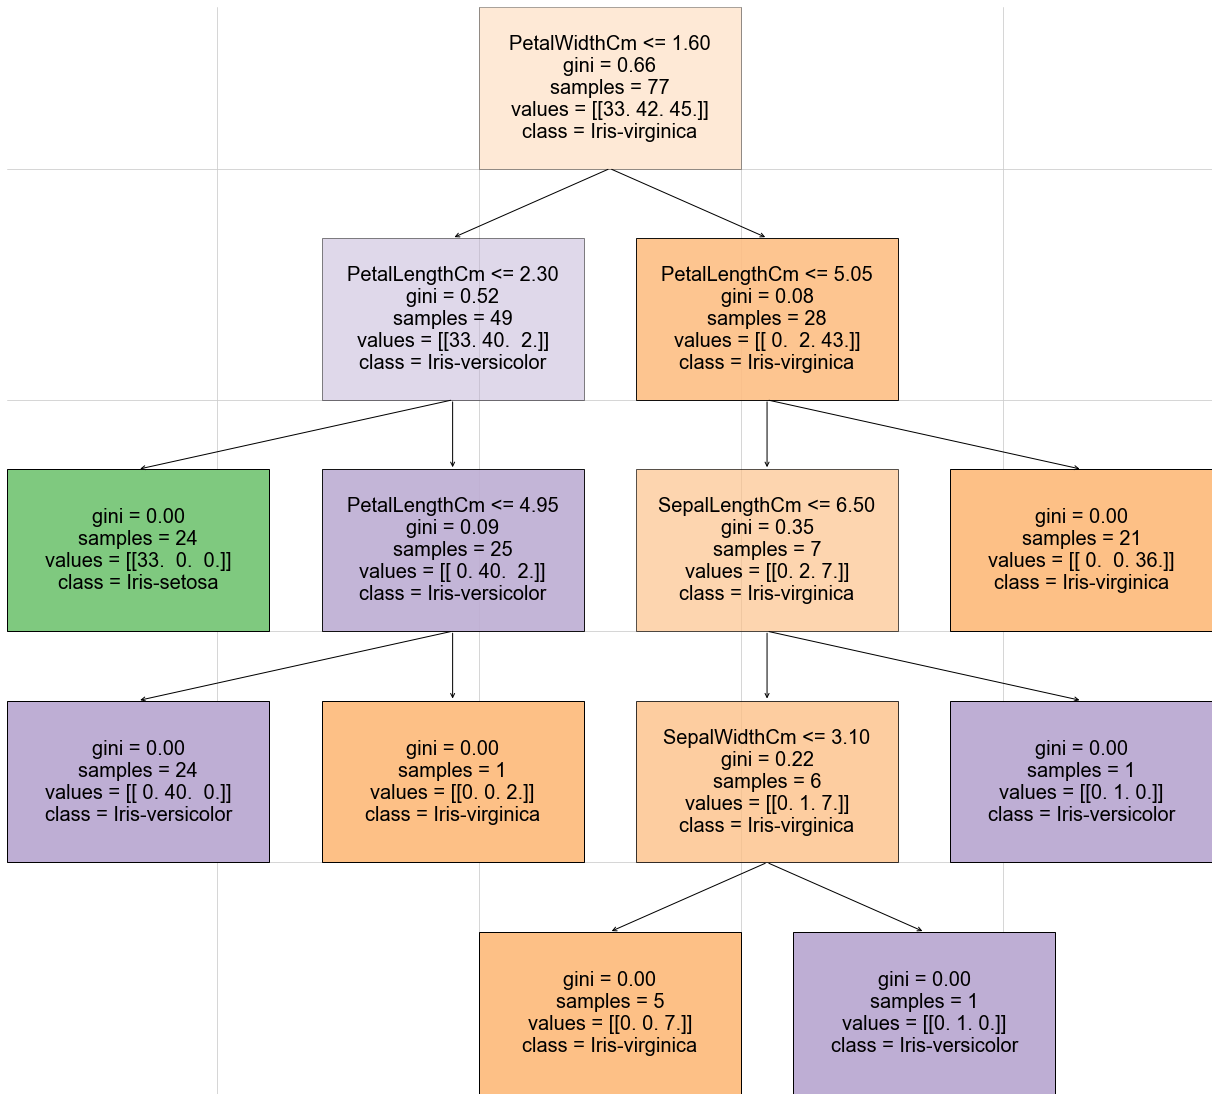

In [35]:
cn=['Iris-setosa','Iris-versicolor','Iris-virginica']
dtree = dtreeplt(
    model=rf.estimators_[5],
    feature_names=X_train.columns,
    target_names=cn
)
fig = dtree.view()